In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from keras import applications
from keras.optimizers import SGD,Adam
from keras.optimizers import Adam
from keras.models import load_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

In [4]:
train = pd.read_csv('train/train.csv')

In [5]:
list1 = []
list2 = []
list3 = []
list4 = []
list5 = []
for i in range(len(train['category'])):
    if train['category'][i] == 1:
        list1.append(train['image'][i])
    elif train['category'][i] == 2:
        list2.append(train['image'][i])
    elif train['category'][i] == 3:
        list3.append(train['image'][i])
    elif train['category'][i] == 4:
        list4.append(train['image'][i])
    else:
        list5.append(train['image'][i])

In [6]:
src = '/home/charan/Analytics Vidhya/GOT DeepLearning/train/images/'
dest = '/home/charan/Analytics Vidhya/GOT DeepLearning/data Augumentation/5/'

In [26]:
import os
import shutil
src_files = list5
for i in range(len(list5)):
    X = list5[i]
    full_file_name = os.path.join(src, X)
    #print(full_file_name)
    shutil.copy(full_file_name, dest)
print('hola')

hola


## data augumentation

In [7]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt

Original


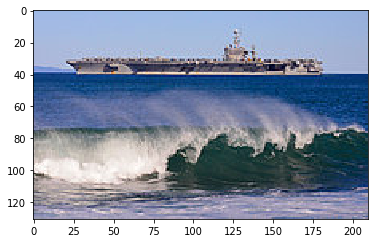

In [8]:
img = load_img('train/images/2002178.jpg')
print('Original')
plt.imshow(img)
plt.show()

In [9]:
data_generator = ImageDataGenerator(rotation_range=15,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

In [10]:
X = img_to_array(img) 
X = X.reshape((1,) + X.shape) 

Transfomed


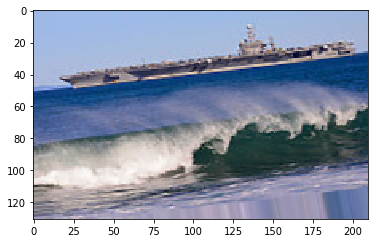

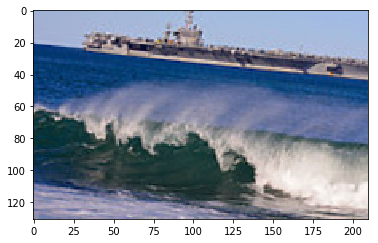

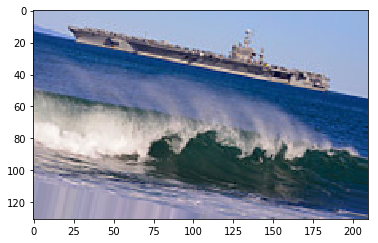

In [13]:
i = 0
print('Transfomed')
for batch in data_generator.flow(X):
    i += 1
    plt.imshow(array_to_img(batch[0]))
    plt.show()
    if i % 3 == 0:  # Generate three transformed pictures
        break  # To avoid generator to loop indefinitely

 ## new method

In [14]:
import os
import random
from scipy import ndarray

# image processing library
import skimage as sk
from skimage import transform
from skimage import util
from skimage import io

In [15]:
def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array: ndarray):
    # add random noise to the image
    return sk.util.random_noise(image_array)

def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]

In [49]:
# dictionary of the transformations we defined earlier
available_transformations = {
    'rotate': random_rotation,
    'noise': random_noise,
    'horizontal_flip': horizontal_flip
}

In [50]:
folder_path = 'images/cat'
num_files_desired = 25

In [51]:
# find all files paths from the folder
images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

In [58]:
num_generated_files = 0
# print(num_generated_files)
# print(num_files_desired)
while num_generated_files <= num_files_desired:
    # random image from the folder
    image_path = random.choice(images)
    #print(image_path)
    # read image as an two dimensional array of pixels
    image_to_transform = sk.io.imread(image_path)
    #print(image_to_transform)
    # random num of transformation to apply
    num_transformations_to_apply = random.randint(1, len(available_transformations))
    
    num_transformations = 0
    transformed_image = None
    # write image to the dis
    num_generated_files += 1
    new_file_path = '%s/augmented_image_%s.jpg' % (folder_path, num_generated_files)
    while num_transformations <= num_transformations_to_apply:
        # random transformation to apply for a single image
        key = random.choice(list(available_transformations))
        transformed_image = available_transformations[key](image_to_transform)
        num_transformations += 1
        io.imsave(new_file_path, transformed_image)
        #new_file_path = '%s/augmented_image_%s.jpg' % (folder_path, num_generated_files)


In [ ]:
'images/cat/au'

## saving to csv

In [68]:
import os, csv

f=open("images/cat/sample_submission_ns2btKE.csv",'r+')
w=csv.writer(f)
for files in os.walk("images/cat"):
    for filename in files:
        print(filename)
        w.writerow([filename])

images/cat
[]
['augmented_image_7.jpg', 'augmented_image_5.jpg', 'augmented_image_15.jpg', 'augmented_image_18.jpg', 'augmented_image_11.jpg', 'augmented_image_19.jpg', 'augmented_image_4.jpg', '451228.jpg', 'augmented_image_12.jpg', '299803.jpg', 'augmented_image_21.jpg', '299795.jpg', 'augmented_image_23.jpg', 'augmented_image_13.jpg', 'sample_submission_ns2btKE.csv', '389050.jpg', 'augmented_image_20.jpg', 'augmented_image_8.jpg', 'augmented_image_17.jpg', 'augmented_image_1.jpg', 'augmented_image_2.jpg', 'augmented_image_6.jpg', 'augmented_image_24.jpg', 'augmented_image_26.jpg', 'augmented_image_22.jpg', 'augmented_image_10.jpg', '427198.jpg', 'augmented_image_16.jpg', 'augmented_image_3.jpg', '382937.jpg', '299806.jpg', 'augmented_image_9.jpg', '299796.jpg', 'augmented_image_25.jpg', 'augmented_image_14.jpg']


In [69]:
#test = pd.read_csv('images/cat/sample_submission_ns2btKE.csv')

In [62]:
test.head()

,image,category
0,1007700.jpg,1
1,1011369.jpg,1
2,1051155.jpg,1
3,1062001.jpg,1
4,1069397.jpg,1


In [70]:
import csv
import glob
with open('images/cat/sample_submission_ns2btKE.csv', 'w') as f:
    writer = csv.writer(f)
    a = glob.glob('images/cat/*.jpg')
    writer.writerows(zip(a)) #if you need the results in a column

In [71]:
test = pd.read_csv('images/cat/sample_submission_ns2btKE.csv')

In [74]:
test.head()

,images/cat/augmented_image_7.jpg
0,images/cat/augmented_image_5.jpg
1,images/cat/augmented_image_15.jpg
2,images/cat/augmented_image_18.jpg
3,images/cat/augmented_image_11.jpg
4,images/cat/augmented_image_19.jpg
